In [42]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.style.use('ggplot') #Good choice!!!!!!!!!
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize']=8,6

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

from sklearn.preprocessing import Imputer, Normalizer,StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold


In [4]:
train=pd.read_csv('data/titanic/train.csv')
test=pd.read_csv('data/titanic/test.csv')
full=train.append(test,ignore_index=True)

In [9]:
full=pd.concat([train, test],ignore_index=True)

In [10]:
full.head(2)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599


In [14]:
full.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

Age
Fare


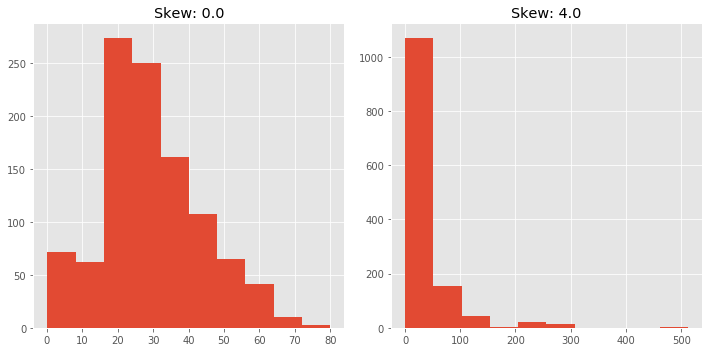

In [19]:

fig=plt.figure(figsize=(10,5))
var=['Age','Fare']
for i, var_name in enumerate(var):
    print(var_name)
    ax=fig.add_subplot(1,2,i+1)
    full[var_name].hist(bins=10, ax=ax)
    ax.set_title('Skew: '+str(round(full[var_name].skew())))
fig.tight_layout()
plt.show()

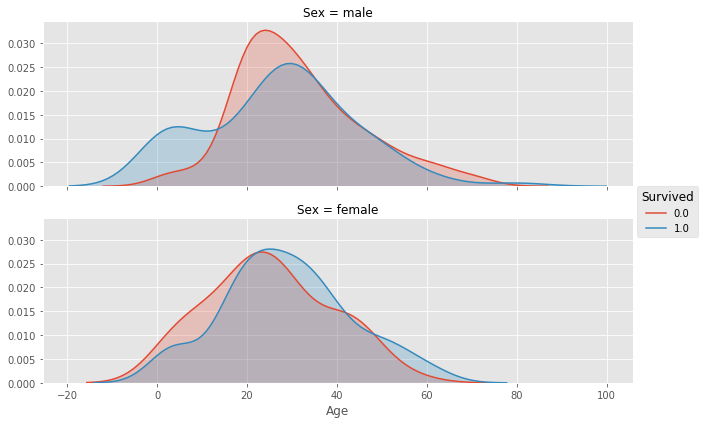

In [20]:
facet=sns.FacetGrid(full, hue='Survived',aspect=3, row='Sex')
facet.map(sns.kdeplot, 'Age',shade=True)
facet.add_legend()

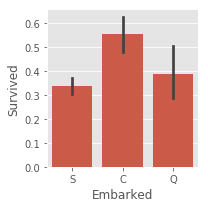

In [21]:
facet=sns.FacetGrid(full)
facet.map(sns.barplot, 'Embarked','Survived')

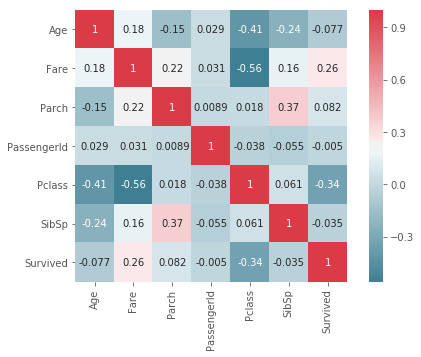

In [22]:
corre=full.corr()
fig, ax=plt.subplots(figsize=(8,5))
cmap=sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corre, square=True, annot=True, cmap=cmap,ax=ax, annot_kws={'fontsize':10})

In [28]:
del train, test
titanic=full[:891]
print('Datasets: full-',full.shape,' titanic-',titanic.shape)

Datasets: full- (1309, 12)  titanic- (891, 12)


In [29]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [30]:
titanic.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838
std,14.526497,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000


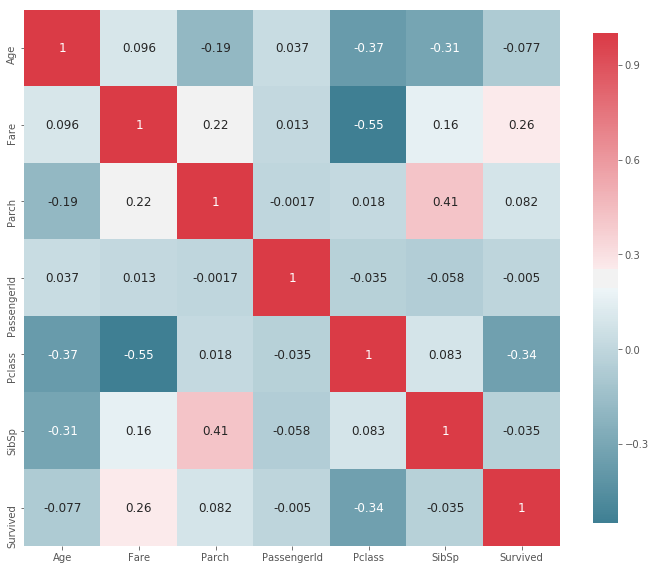

In [32]:
def plot_correlation_map(df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
plot_correlation_map(titanic)

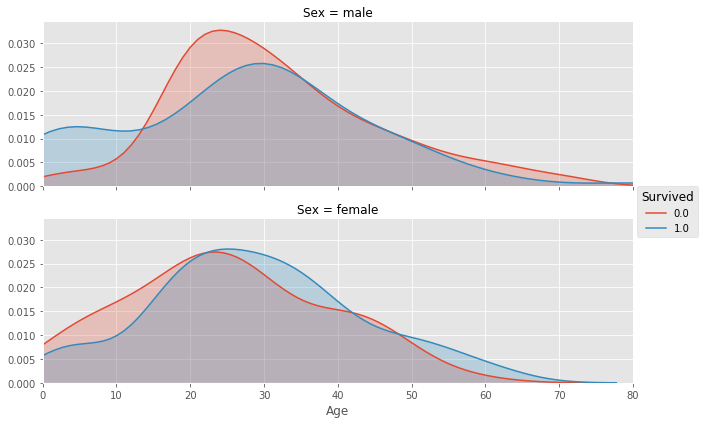

In [49]:

def plot_distribution(df, var, target,**kwargs):
    row=kwargs.get('row',None)
    col=kwargs.get('col',None)
    facet=sns.FacetGrid(df, hue=target, row=row, col=col, aspect=3)
    facet.map(sns.kdeplot, var, shade=True)
    facet.set(xlim=(0, df[var].max()))
    facet.add_legend()
plot_distribution(titanic, "Age",'Survived',row='Sex')

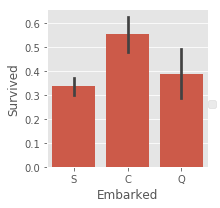

In [52]:
def plot_categories(df, var, target, **kwargs):
    row=kwargs.get('row',None)
    col=kwargs.get('col',None)
    facet=sns.FacetGrid(df, aspect=1,row=row, col=col)
    facet.map(sns.barplot, var, target)
    facet.add_legend()
plot_categories(titanic, 'Embarked','Survived')

In [56]:
np.where(titanic.Sex=='male',1,0)

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0,

In [67]:
sex=pd.Series(np.where(full.Sex=='male',1,0), name='Sex')
embarked=pd.get_dummies(full.Embarked, prefix='embark')
pclass=pd.get_dummies(full.Pclass, prefix='class')

In [72]:
imputed=pd.DataFrame()
imputed['Age']=full.Age.fillna(full.Age.mean())
imputed['Fare']=full.Fare.fillna(full.Fare.mean())
imputed.shape

(1309, 2)

In [69]:
full.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [73]:
full['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [122]:
title=pd.DataFrame()
title['Title']=full.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
title['Title'].head(10)


0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

In [123]:
title.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Mlle              2
Major             2
Don               1
Lady              1
Mme               1
Dona              1
Capt              1
the Countess      1
Jonkheer          1
Sir               1
Name: Title, dtype: int64

In [106]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                    }
print(Title_Dictionary.keys())
print(Title_Dictionary.values())

dict_keys(['Capt', 'Col', 'Major', 'Jonkheer', 'Don', 'Sir', 'Dr', 'Rev', 'the Countess', 'Dona', 'Mme', 'Mlle', 'Ms', 'Mr', 'Mrs', 'Miss', 'Master', 'Lady'])
dict_values(['Officer', 'Officer', 'Officer', 'Royalty', 'Royalty', 'Royalty', 'Officer', 'Officer', 'Royalty', 'Royalty', 'Mrs', 'Miss', 'Mrs', 'Mr', 'Mrs', 'Miss', 'Master', 'Royalty'])


In [127]:
title.Title=title.Title.map(Title_Dictionary)

In [129]:
title=pd.get_dummies(title.Title)

In [132]:
full.Cabin.fillna('U').value_counts()

U                  1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F4                    4
C78                   4
D                     4
B96 B98               4
F33                   4
F2                    4
C22 C26               4
E34                   3
B58 B60               3
A34                   3
B51 B53 B55           3
E101                  3
C101                  3
C46                   2
B35                   2
E121                  2
C65                   2
F G73                 2
C31                   2
C85                   2
D30                   2
D35                   2
C125                  2
E44                   2
E25                   2
C106                  2
                   ... 
E39 E41               1
C87                   1
D47                   1
E68                   1
E60                   1
B52 B54 B56           1
E52                   1
E38                   1
F E46                 1
B4                    1
C82             

In [134]:
cabin=full.Cabin.fillna('U')
cabin=cabin.apply(lambda c: c[0])
cabin.value_counts()

U    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [135]:
cabin=pd.get_dummies(cabin,prefix='Cabin')
cabin.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [136]:
full.Ticket[:5]

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [146]:
ti=full.Ticket[0]
ti=ti.replace('/','')
ti=ti.split()
ti

['A5', '21171']

In [147]:
ti=list(map(lambda t: t.strip(), ti))
ti

['A5', '21171']

In [148]:
ti=filter(lambda i: not i.isdigit(), ti)
list(ti)

['A5']

In [149]:
def clean_tickets(ticket):
    ticket=ticket.replace('/','')
    ticket=ticket.replace('.','')
    ticket=ticket.split()
    ticket=list(map(lambda t: t.strip(), ticket))
    ticket=list(filter(lambda t: not t.isdigit(), ticket))
    if(len(ticket)>0):
        return ticket[0]
    else:
        return 'XXX'
    
tickets=full.Ticket.apply(clean_tickets)
tickets.head()

0        A5
1        PC
2    STONO2
3       XXX
4       XXX
Name: Ticket, dtype: object

In [150]:
tickets=pd.get_dummies(tickets, prefix='ticket')
print(tickets.shape)
tickets.head()

(1309, 37)


,ticket_A,ticket_A4,ticket_A5,ticket_AQ3,ticket_AQ4,ticket_AS,ticket_C,ticket_CA,ticket_CASOTON,ticket_FC,...,ticket_SOTONO2,ticket_SOTONOQ,ticket_SP,ticket_STONO,ticket_STONO2,ticket_STONOQ,ticket_SWPP,ticket_WC,ticket_WEP,ticket_XXX
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [151]:
family=pd.DataFrame()
family['Family']=full.Parch + full.SibSp +1

In [156]:
family['Family_single']=family.Family.apply(lambda s: 1 if s==1 else 0)
family['Family_small']=family.Family.apply(lambda s: 1 if 2<=s<=4 else 0)
family['Family_large']=family.Family.apply(lambda s: 1 if 5<=s else 0)
family.head()

,Family,Family_single,Family_small,Family_large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


In [162]:
full_x=pd.concat([imputed,embarked,cabin, sex],axis=1)
full_x.head()

,Age,Fare,embark_C,embark_Q,embark_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Sex
0,22.0,7.2500,0,0,1,0,0,0,0,0,0,0,0,1,1
1,38.0,71.2833,1,0,0,0,0,1,0,0,0,0,0,0,0
2,26.0,7.9250,0,0,1,0,0,0,0,0,0,0,0,1,0
3,35.0,53.1000,0,0,1,0,0,1,0,0,0,0,0,0,0
4,35.0,8.0500,0,0,1,0,0,0,0,0,0,0,0,1,1


In [164]:
train_valid_x=full_x[:891]
train_valid_y=titanic.Survived
test_X=full_x[891:]
train_X, valid_X, train_y, valid_y=train_test_split(train_valid_x, train_valid_y, test_size=.3)
print (full_x.shape , train_X.shape , valid_X.shape , train_y.shape , valid_y.shape , test_X.shape)

(1309, 15) (623, 15) (268, 15) (623,) (268,) (418, 15)


In [165]:
clf=DecisionTreeClassifier()
clf.fit(train_X,train_y)
importance=clf.feature_importances_

In [194]:
imp=pd.DataFrame({'importance':importance}, index=train_X.columns)


In [195]:
imp=imp.sort_values(by='importance')
imp

,importance
embark_Q,0.000000
Cabin_B,0.000000
Cabin_F,0.000000
Cabin_T,0.000000
Cabin_C,0.001187
Cabin_A,0.004066
Cabin_E,0.005343
Cabin_D,0.006233
Cabin_G,0.006455
embark_S,0.014343


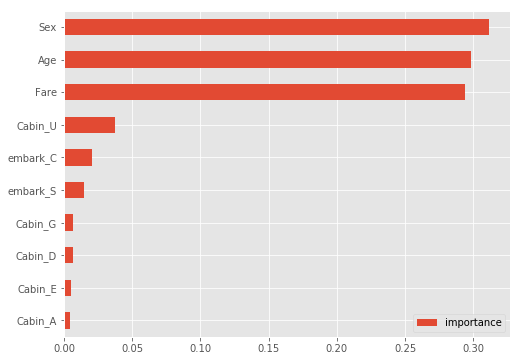

In [196]:
imp[-10:].plot.barh()

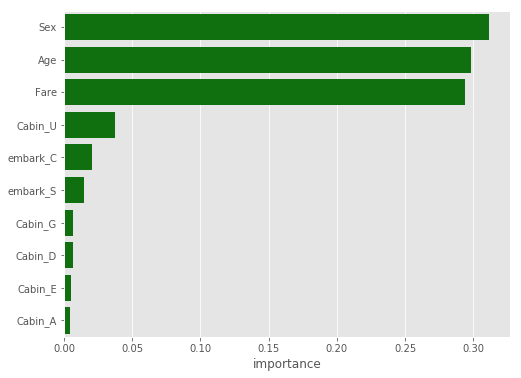

In [192]:
imp=imp.sort_values(by='importance',ascending=False)
sns.barplot(imp.importance[:10],imp.index[:10], color='g')

In [197]:
model=RandomForestClassifier(n_estimators=200)
model.fit(train_X,train_y)
model.score(train_X, train_y)

0.985553772070626

In [198]:
model.score(valid_X, valid_y)

0.75